#                            Stock Analysis and Price Prediction

# Contents
    1. Introduction
    2. Importing libraries
    3. Reading datasets
    4. Building Models
    5. Conclusion

# Introduction
In this project we will show how to write a python program that predicts the price of stocks using a machine learning technique called Long Short-Term Memory (LSTM) as well as create a optimize portfoilo using Efficient Frontier.

We will be solve the following question:

1. What was the change in price of the stock over time?
2. What was the monthly return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks'?
5. How much value do we put at risk by investing in a particular stock?
6. Portfoilo optimization using Efficient Frontier?
7. How can we attempt to predict future stock behavior using LSTM?

# Importing Libraries

In [1]:
# here we are importing important libraries
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
from pandas_datareader import data as web
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

plt.style.use("Solarize_Light2")
sns.set_style('whitegrid')
%matplotlib inline

# Reading Dataset

Companies names and thier Ticker that we used for our Analysis
    
    1. Apple Inc. = AAPL
    2. Alphabet Inc. = GOOG
    3. Microsoft Corporation = MSFT
    4. Amazon = AMZN
    5. Facebook Inc. = FB
    6. Alibaba Group = BABA
    7. Johnson & Johnson = JNJ
    8. JPMorgon Chase & Co. = JPM
    9. ExxonMobil = XOM
    10.Bank of America = BAC
    11.WalMart Store Inc. = WMT
    12.Wells Fargo & Co. = WFC
    13.Visa Inc. = V
    14.Procter & Gamble Co. = PG
    15.Verizon Communication = VZ
    16.AT&T Inc. = T
    17.UnitedHealth Group Inc. = UNH
    18.Home Depot = HD
    19.Intel = INTC
    20.Oracle = ORCL


1. What was the change in price of the stock over time?

In [2]:
#List of ticker of companies
ticker_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB', 'BABA','JNJ', 'JPM', 'XOM', 'BAC', 'WMT', 'WFC', 'V', 'PG', 'VZ', 'T', 'UNH', 'HD', 'INTC', 'ORCL']
data = pdr.get_data_yahoo(ticker_list, start = '2015-01-01')
data.tail()

Attributes   Adj Close                                                    \
Symbols           AAPL         GOOG        MSFT         AMZN          FB   
Date                                                                       
2020-11-04  114.752022  1749.130005  216.389999  3241.159912  287.380005   
2020-11-05  118.824997  1763.369995  223.289993  3322.000000  294.679993   
2020-11-06  118.690002  1761.750000  223.720001  3311.370117  293.410004   
2020-11-09  116.320000  1763.000000  218.389999  3143.739990  278.769989   
2020-11-10  115.970001  1740.390015  211.009995  3035.020020  272.429993   

Attributes                                                            ...  \
Symbols           BABA         JNJ         JPM        XOM        BAC  ...   
Date                                                                  ...   
2020-11-04  295.709991  139.399994  100.250000  32.447166  23.680000  ...   
2020-11-05  287.750000  139.759995  104.349998  32.388577  24.610001  ...   
2020-11-06  299.950012  142.250000  102.959999  32.007767  24.309999  ...   
2020-11-09  290.529999  146.080002  116.900002  36.060001  27.760000  ...   
2020-11-10  266.540009  148.279999  116.519997  36.860001  27.660000  ...   

Attributes     Volume                                                   \
Symbols           WMT          WFC           V          PG          VZ   
Date                                                                     
2020-11-04  5975800.0   47203200.0   8102700.0   5820600.0  20785700.0   
2020-11-05  4734200.0   38319700.0   7132100.0   5673100.0  20156400.0   
2020-11-06  5399500.0   29502900.0   6180500.0   4702300.0  11986200.0   
2020-11-09  9399500.0  102118900.0  17916900.0  12664700.0  24265900.0   
2020-11-10  6059300.0   48986000.0   7940800.0   7853100.0  22049300.0   

Attributes                                                             
Symbols              T         UNH         HD        INTC        ORCL  
Date                                                                   
2020-11-04  45482700.0  10344900.0  3525300.0  34748200.0  12054900.0  
2020-11-05  35119400.0   4786500.0  2516600.0  31103200.0   9017100.0  
2020-11-06  26235300.0   2994900.0  2839100.0  36233700.0   7510400.0  
2020-11-09  70674000.0   4635300.0  7856400.0  48481700.0  11486600.0  
2020-11-10  44168200.0   3732100.0  4827200.0  39210700.0   9015900.0  

[5 rows x 120 columns]

In [3]:
# Getting Monthly Adjused Close of all companies
monthly_adjusted_close = data['Adj Close'].resample('M').ffill()
monthly_adjusted_close.head()

Symbols,AAPL,GOOG,MSFT,AMZN,FB,BABA,JNJ,JPM,XOM,BAC,WMT,WFC,V,PG,VZ,T,UNH,HD,INTC,ORCL
Date,,,,,,,,,,,,,,,,,,,,
2015-01-31,26.465057,533.056519,35.983208,354.529999,75.910004,89.080002,85.573952,46.027359,66.733025,13.649244,73.640938,42.770687,61.146324,70.756332,35.313831,23.791393,96.975800,91.611542,28.040426,38.178539
2015-02-28,29.132116,556.871094,39.333977,380.160004,78.970001,85.120003,88.212410,51.867531,68.096741,14.243868,72.731041,45.432430,65.198555,71.461449,38.203213,24.976627,103.711617,100.674446,28.421066,39.937538
2015-03-31,28.218189,546.499573,36.472504,372.100006,82.220001,83.239998,86.568802,51.275059,65.374107,13.908826,71.703300,45.109032,62.874763,68.783653,37.569717,23.596268,108.326088,100.187141,26.728615,39.326889
2015-04-30,28.381468,537.340027,43.630669,421.779999,78.769997,81.290001,85.364075,53.899288,67.196884,14.396860,68.041862,45.689484,63.489944,67.280663,39.407963,25.394379,102.016464,94.340485,27.822720,39.894619
2015-05-31,29.668266,532.109985,42.307163,429.230011,79.190002,89.320000,86.801384,56.046398,66.069901,14.911998,65.155190,46.717010,66.133545,66.332932,38.626678,25.321066,110.084366,98.255898,29.668322,39.775715


In [4]:
#Here is quick summary of each company Monthly Adjusted closing
monthly_adjusted_close.describe()

Symbols,AAPL,GOOG,MSFT,AMZN,FB,BABA,JNJ,JPM,XOM,BAC,WMT,WFC,V,PG,VZ,T,UNH,HD,INTC,ORCL
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,45.655751,1001.575172,96.096354,1366.355914,157.676901,149.206901,117.321440,84.879510,63.307113,22.409855,86.281207,43.865975,120.765297,88.215651,46.567994,29.481754,197.706169,164.507832,40.262152,44.978050
std,24.705105,297.148595,52.188308,773.206253,49.905269,60.274827,19.835375,23.440817,10.569169,6.283318,24.621771,8.181078,46.934749,22.026883,7.449311,3.170092,69.350340,51.566334,10.731299,7.229304
min,21.652395,520.510010,35.983208,354.529999,75.910004,58.970001,81.534782,46.027359,31.851534,11.417576,50.558086,21.351967,61.146324,60.289993,34.394016,23.596268,96.975800,91.611542,24.775625,33.158382
25%,27.479910,758.459991,51.744623,736.329987,118.000000,88.445000,101.579391,58.252266,62.243469,15.303787,65.083275,42.543207,75.983715,71.465218,41.177639,27.531026,129.450119,119.403103,30.655752,38.099308
50%,39.952976,1021.409973,82.205322,1176.750000,164.460007,164.759995,121.332458,92.036423,66.649574,23.700001,81.947502,45.584629,112.023186,79.183121,44.657658,29.177425,211.202835,167.182297,42.449692,45.797440
75%,52.422976,1190.974976,130.119598,1790.775024,189.269997,185.550003,131.020203,101.568729,70.301388,27.717026,103.525887,48.868793,161.759239,104.116669,53.237133,31.871772,247.919510,196.570534,48.475605,50.750965
max,128.817749,1740.390015,225.529999,3450.959961,293.200012,304.690002,153.410004,134.515091,75.311615,34.513897,145.559998,59.070923,213.309998,140.259995,61.099998,36.577629,353.690002,283.544739,62.378933,59.459236


In [5]:
# Getting Monthly volume of all companies
monthly_volume = data['Volume'].resample('M').ffill()
monthly_volume.head()

Symbols,AAPL,GOOG,MSFT,AMZN,FB,BABA,JNJ,JPM,XOM,BAC,WMT,WFC,V,PG,VZ,T,UNH,HD,INTC,ORCL
Date,,,,,,,,,,,,,,,,,,,,
2015-01-31,334982000.0,5606300.0,78004900.0,23856100.0,42649500.0,36806900.0,10676300.0,26943700.0,22679900.0,99844600.0,10280200.0,21754800.0,22151600.0,14685300.0,22768000.0,56280900.0,5397500.0,7000000.0,38719700.0,22590000.0
2015-02-28,248059200.0,2410100.0,33807700.0,2532300.0,30739200.0,8377200.0,8500000.0,15225900.0,13090600.0,130448200.0,5877400.0,12937000.0,7965200.0,7685000.0,17571200.0,19863600.0,4016400.0,5732600.0,24427300.0,9549500.0
2015-03-31,168362400.0,1588000.0,34887200.0,2506100.0,19734300.0,11812900.0,8028000.0,17346700.0,13354000.0,61381700.0,5587700.0,13306200.0,7400500.0,8649700.0,12785700.0,27900200.0,4573100.0,4128800.0,32098500.0,13264200.0
2015-04-30,332781600.0,2082200.0,64725500.0,3647900.0,28999000.0,14209700.0,10170600.0,16840900.0,13947700.0,78313900.0,8795900.0,16577800.0,11780600.0,9409300.0,15604900.0,29693200.0,6705600.0,9041600.0,22013300.0,20196300.0
2015-05-31,203538000.0,2597400.0,36519600.0,3016100.0,16134600.0,13893200.0,9957800.0,14310700.0,14631300.0,74266200.0,6375100.0,17291500.0,6678100.0,12551700.0,14778400.0,29885100.0,6019900.0,5310600.0,43545500.0,10358700.0


2. What was the monthly return of the stock on average?

In [6]:
# Calculating monthly return
monthly_returns = data['Adj Close'].resample('M').ffill().pct_change()
monthly_returns.tail()

Symbols,AAPL,GOOG,MSFT,AMZN,FB,BABA,JNJ,JPM,XOM,BAC,WMT,WFC,V,PG,VZ,T,UNH,HD,INTC,ORCL
Date,,,,,,,,,,,,,,,,,,,,
2020-07-31,0.165132,0.049059,0.007371,0.147114,0.117144,0.163746,0.036479,0.037441,-0.059034,0.047579,0.080314,-0.052344,-0.014340,0.103516,0.054335,-0.004507,0.026547,0.059798,-0.202240,0.007498
2020-08-31,0.216569,0.101972,0.102752,0.090461,0.155832,0.143455,0.059489,0.036734,-0.032131,0.034566,0.077441,-0.000438,0.115076,0.054988,0.031141,0.007776,0.032268,0.073638,0.074713,0.031921
2020-09-30,-0.102526,-0.100711,-0.067397,-0.087579,-0.106753,0.024214,-0.029529,-0.039126,-0.140461,-0.057583,0.007634,-0.026501,-0.056701,0.004771,0.003712,-0.043610,0.001615,-0.020578,0.016290,0.043341
2020-10-31,-0.060012,0.103028,-0.037370,-0.035754,0.004620,0.036431,-0.079057,0.027836,-0.049811,-0.016189,-0.008291,-0.087622,-0.091314,-0.008121,-0.031824,-0.034836,-0.021266,-0.039610,-0.144844,-0.056328
2020-11-30,0.067151,0.073645,0.042179,-0.000372,0.035422,-0.125209,0.081467,0.188494,0.157244,0.167089,0.049081,0.132917,0.173903,0.023049,0.072118,0.067728,0.159107,0.033220,0.033661,0.009980


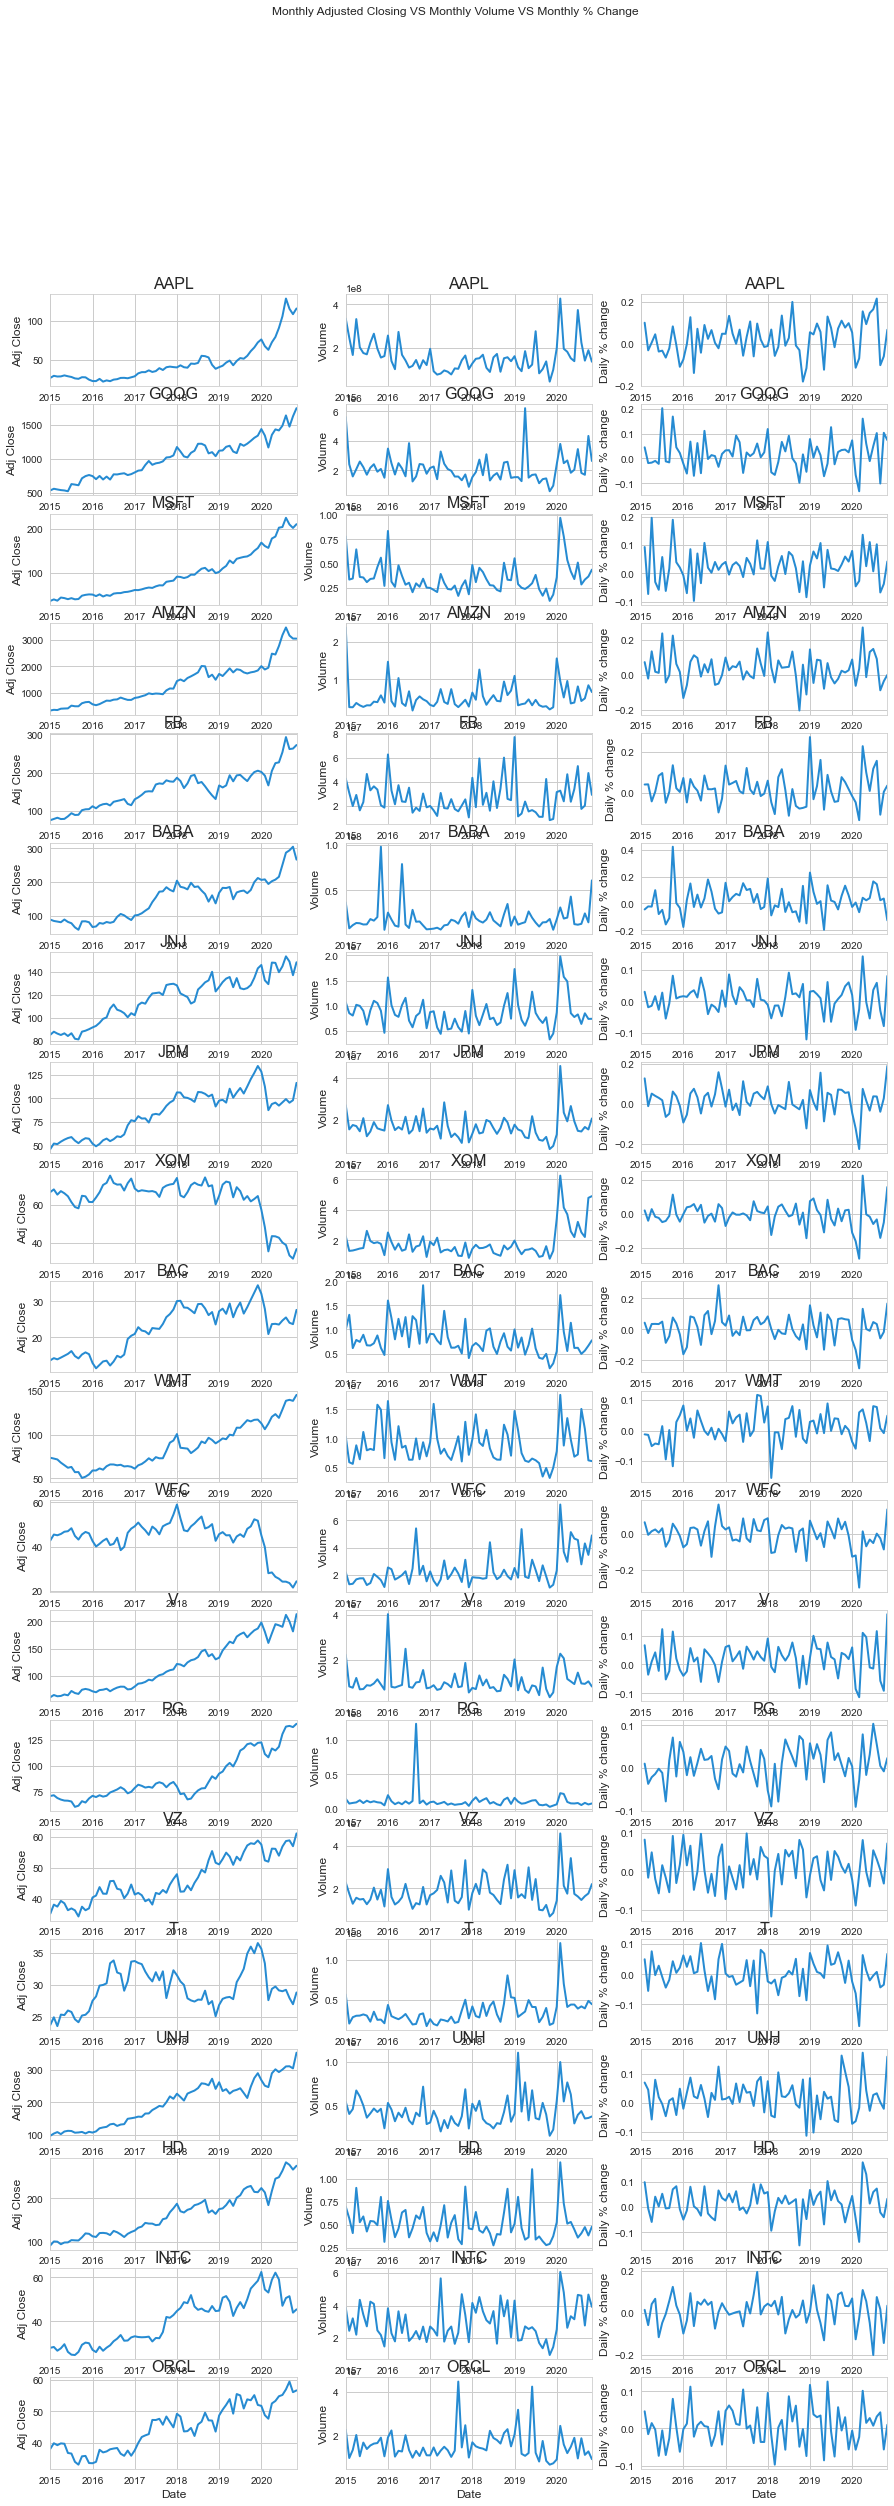

In [7]:
# here we are visualising of Monthly Adjusted Price, Monthly Volume and Monthly % Change

fig, axes = plt.subplots(nrows = 20, ncols = 3)
fig.suptitle('Monthly Adjusted Closing VS Monthly Volume VS Monthly % Change')
fig.set_figheight(40)
fig.set_figwidth(15)
#plt.subplots_adjust(top=2.25, bottom=2.2)

columns = list(monthly_adjusted_close) 
  
for i, cols in enumerate(columns,0):
    monthly_adjusted_close[cols].plot(ax = axes[i,0])
    axes[i,0].set(xlabel='Date', ylabel='Adj Close')
    axes[i,0].set_title(f"{ticker_list[i]}")
    monthly_volume[cols].plot(ax = axes[i,1])
    axes[i,1].set(xlabel='Date', ylabel='Volume')
    axes[i,1].set_title(f"{ticker_list[i]}")
    monthly_returns[cols].plot(ax = axes[i,2])
    axes[i,2].set(xlabel='Date', ylabel='Daily % change')
    axes[i,2].set_title(f"{ticker_list[i]}")

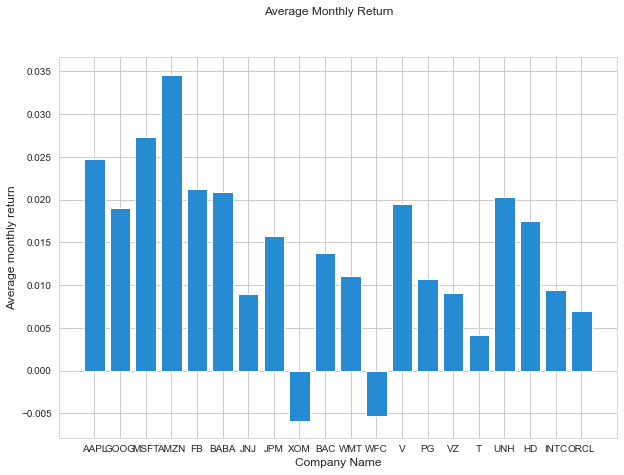

In [8]:
plt.figure(figsize=(10, 7))
plt.bar(columns, monthly_returns.mean())
plt.xlabel('Company Name')
plt.ylabel('Average monthly return')
plt.suptitle('Average Monthly Return')
plt.show()

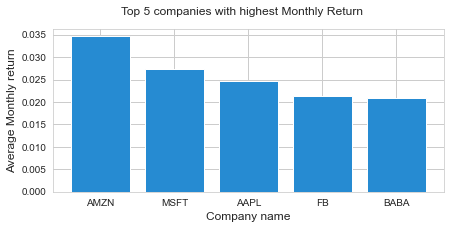

In [9]:
top_five = monthly_returns.mean().nlargest(5)
company_name = list(top_five.keys())
plt.figure(figsize=(7, 3))
plt.bar(company_name, top_five)
plt.suptitle('Top 5 companies with highest Monthly Return')
plt.ylabel('Average Monthly return')
plt.xlabel('Company name')
plt.show()

Now that we've brock down our companies from 20 to 5 on the basic of average percentage change in stock price and also seen the visualizations for the Adjusted price and the volume traded each day with daily percentage change, let's go ahead and caculate the moving average for the stock.

3. What was the moving average of the various stocks?

There are three important moving averages that we have applied to our charts so that it will help us to trade better. They are the 10 moving average, the 20 moving average and the 50 moving average. The 20 moving average (10MA) is the short-term outlook. The 50 moving average (20MA) is the medium term outlook. The 200 moving average (50MA) is the trend bias

In [10]:
# now we are using for loop for grabing yahoo data and setting it in form of dataframe
#  Using globals() is a sloppy way of setting the DataFrame names, but its simple
for stock in company_name:
    globals()[stock] = web.DataReader(stock,"yahoo",'2015-01-01',datetime.now())


In [11]:
company_list = [AMZN,AAPL,FB,MSFT,BABA]
for company, comp_name in zip(company_list,company_name):
    company["company_name"] = comp_name
    
company_data = pd.concat(company_list,axis=0)
company_data.tail(5)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-11-04,299.170013,285.299988,287.790009,295.709991,28791200.0,295.709991,BABA
2020-11-05,291.250000,279.600006,289.089996,287.750000,50065200.0,287.750000,BABA
2020-11-06,300.890015,289.786011,291.489990,299.950012,25259600.0,299.950012,BABA
2020-11-09,304.000000,290.500000,303.769989,290.529999,22559900.0,290.529999,BABA
2020-11-10,280.000000,264.329987,279.970001,266.540009,60967100.0,266.540009,BABA


In [12]:

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

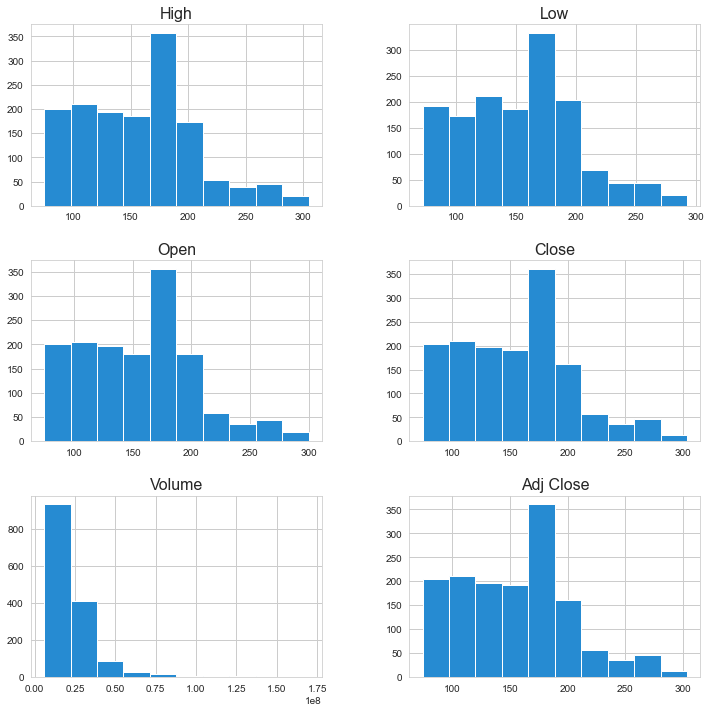

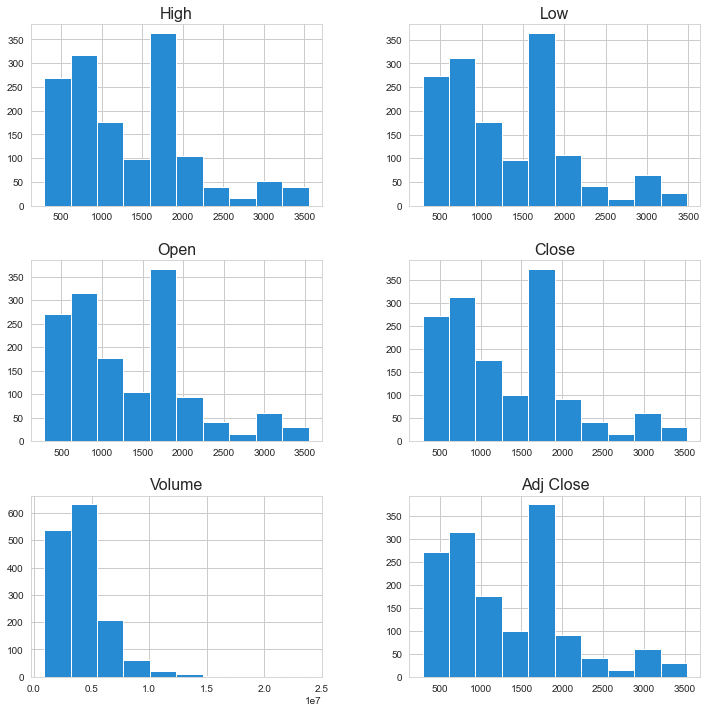

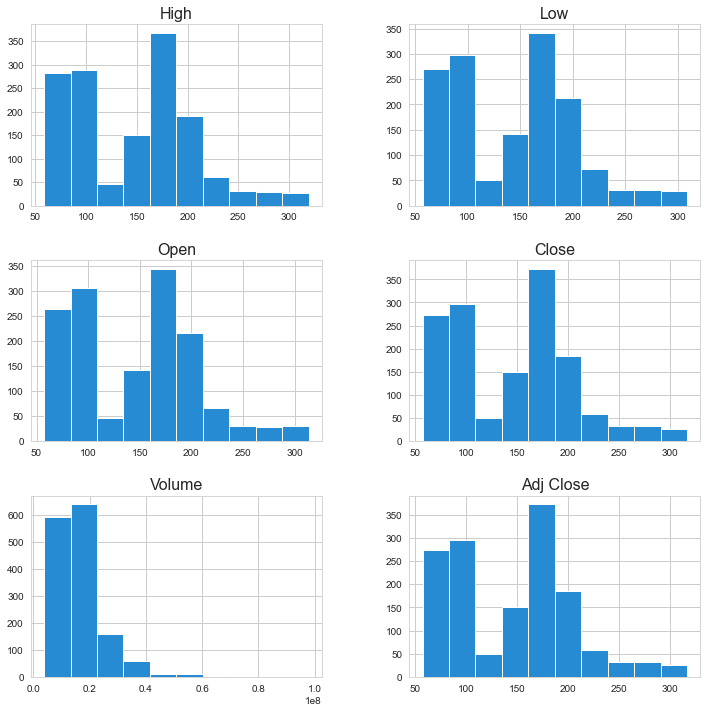

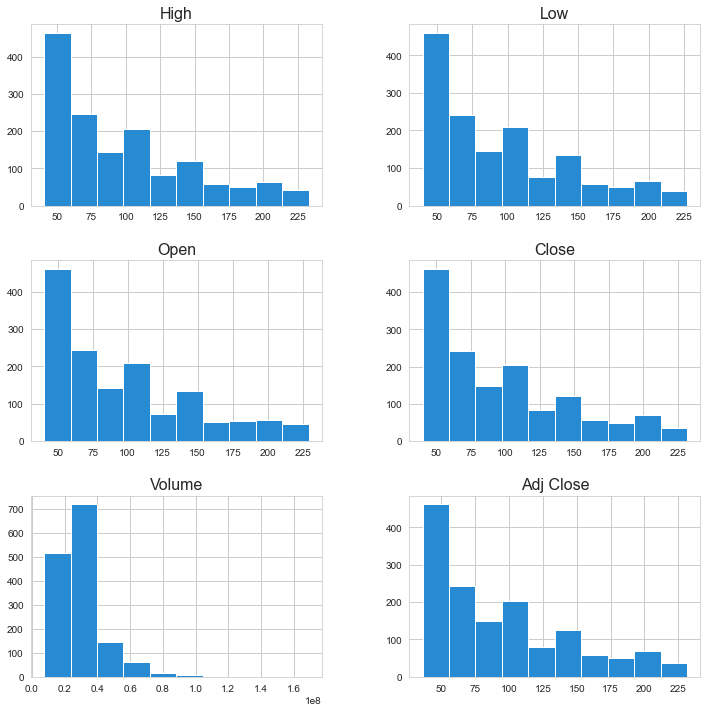

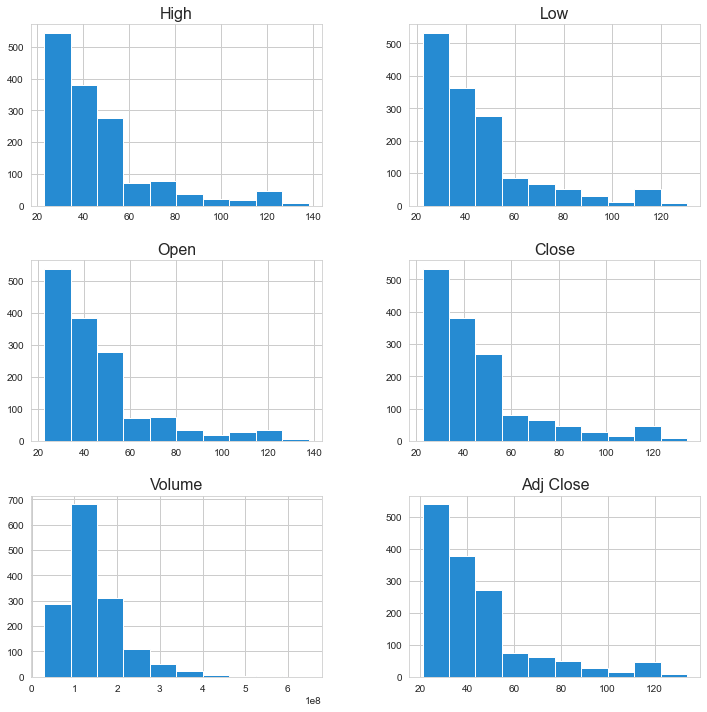

In [13]:
# here we are visualising the additional moving averages
company_data.groupby("company_name").hist(figsize=(12, 12));

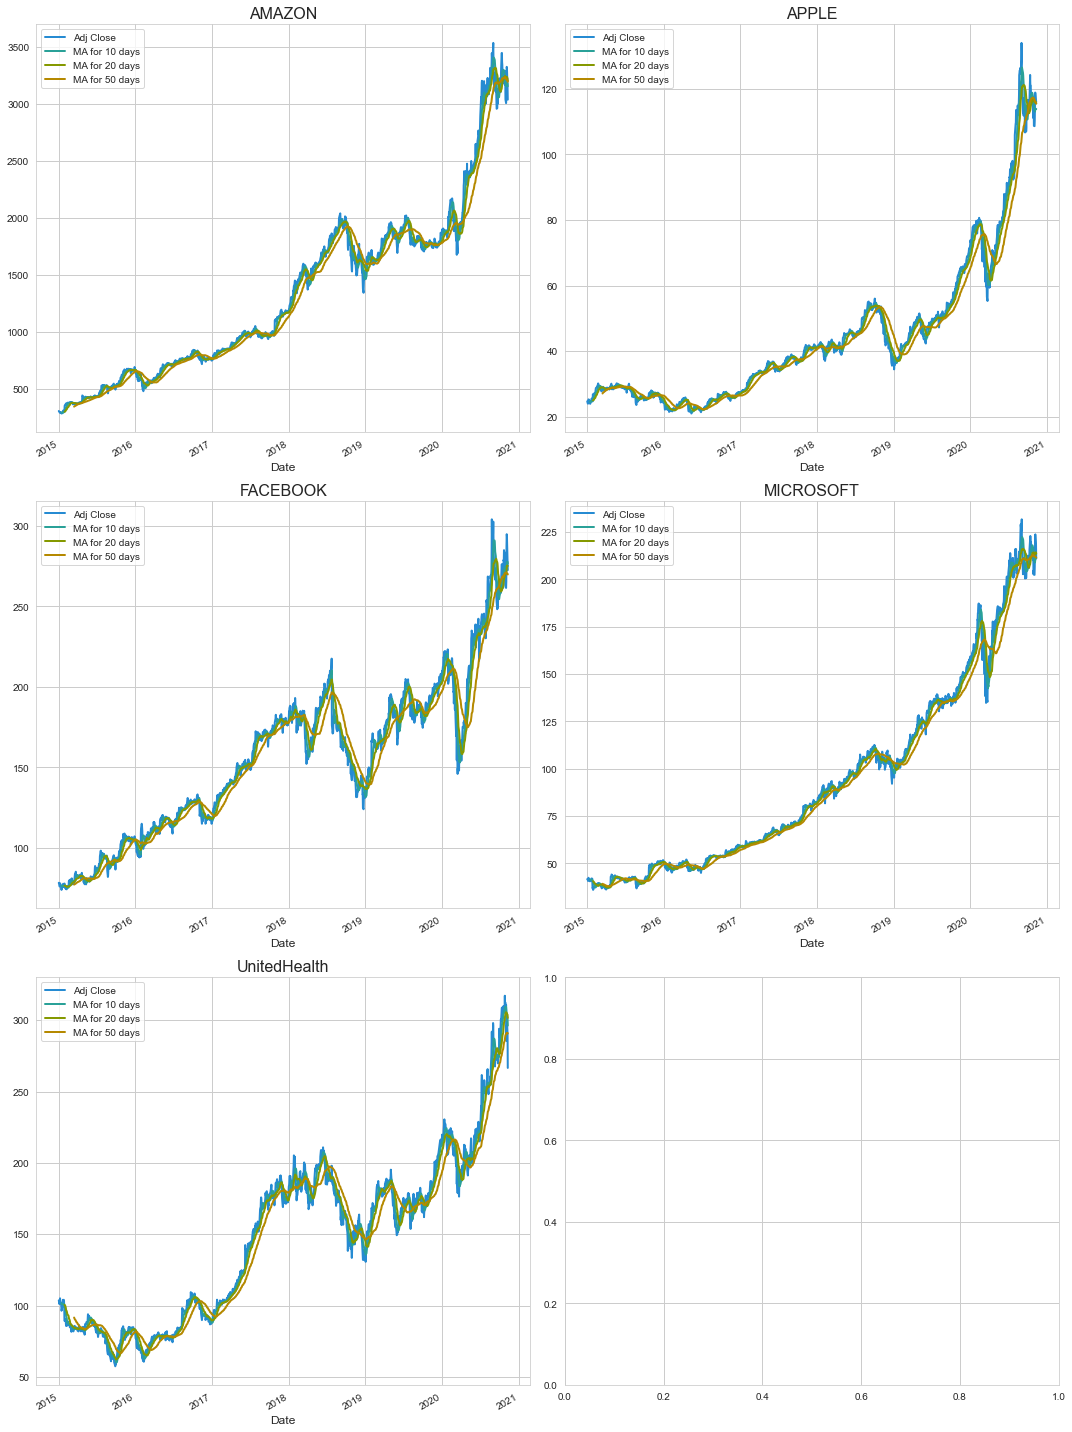

In [14]:
# here we are visualising three important moving averages of all the company
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('AMAZON')

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('APPLE')

FB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('FACEBOOK')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('MICROSOFT')

BABA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('UnitedHealth')

fig.tight_layout()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

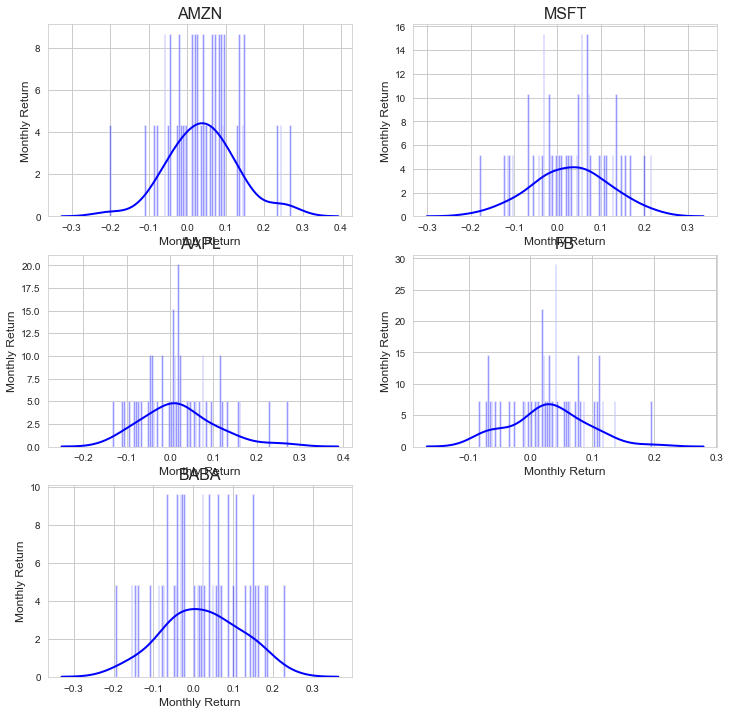

In [15]:
# We'll use pct_change to find the percent change for each month
for company in company_list:
    company['Monthly Return'] = company['Adj Close'].resample('M').ffill().pct_change()

plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    sns.distplot(company['Monthly Return'].dropna(), bins=100, color='blue')
    plt.ylabel('Monthly Return')
    plt.title(f'{company_name[i - 1]}')

4. What was the correlation between different stocks'?

In [16]:
# Getting Top five company Monthly Adjusted Close price
adjusted_close_five= monthly_adjusted_close[company_name]
adjusted_close_five.head()

Symbols,AMZN,MSFT,AAPL,FB,BABA
Date,,,,,
2015-01-31,354.529999,35.983208,26.465057,75.910004,89.080002
2015-02-28,380.160004,39.333977,29.132116,78.970001,85.120003
2015-03-31,372.100006,36.472504,28.218189,82.220001,83.239998
2015-04-30,421.779999,43.630669,28.381468,78.769997,81.290001
2015-05-31,429.230011,42.307163,29.668266,79.190002,89.320000


In [17]:
# here we are Making DataFrame which is Monthly % change
returns_five= adjusted_close_five.pct_change()
returns_five.head()

Symbols,AMZN,MSFT,AAPL,FB,BABA
Date,,,,,
2015-01-31,NaN,NaN,NaN,NaN,NaN
2015-02-28,0.072293,0.093120,0.100777,0.040311,-0.044454
2015-03-31,-0.021202,-0.072748,-0.031372,0.041155,-0.022087
2015-04-30,0.133512,0.196262,0.005786,-0.041961,-0.023426
2015-05-31,0.017663,-0.030334,0.045339,0.005332,0.098782


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


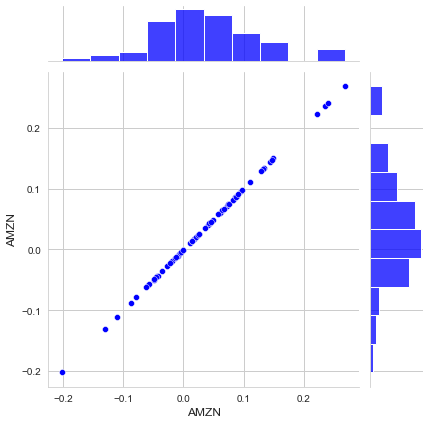

In [18]:
# here we are comparing Amazon to itself should show a perfectly linear relationship
sns.jointplot('AMZN', 'AMZN', returns_five, kind='scatter', color = "blue")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


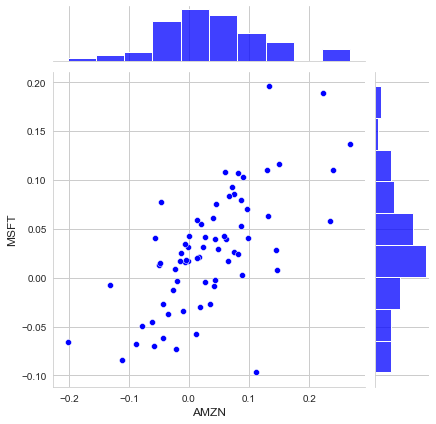

In [19]:
# here We'll use joinplot to compare the daily returns of Amazon and Microsoft
sns.jointplot('AMZN', 'MSFT', returns_five, kind='scatter', color = "blue")

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

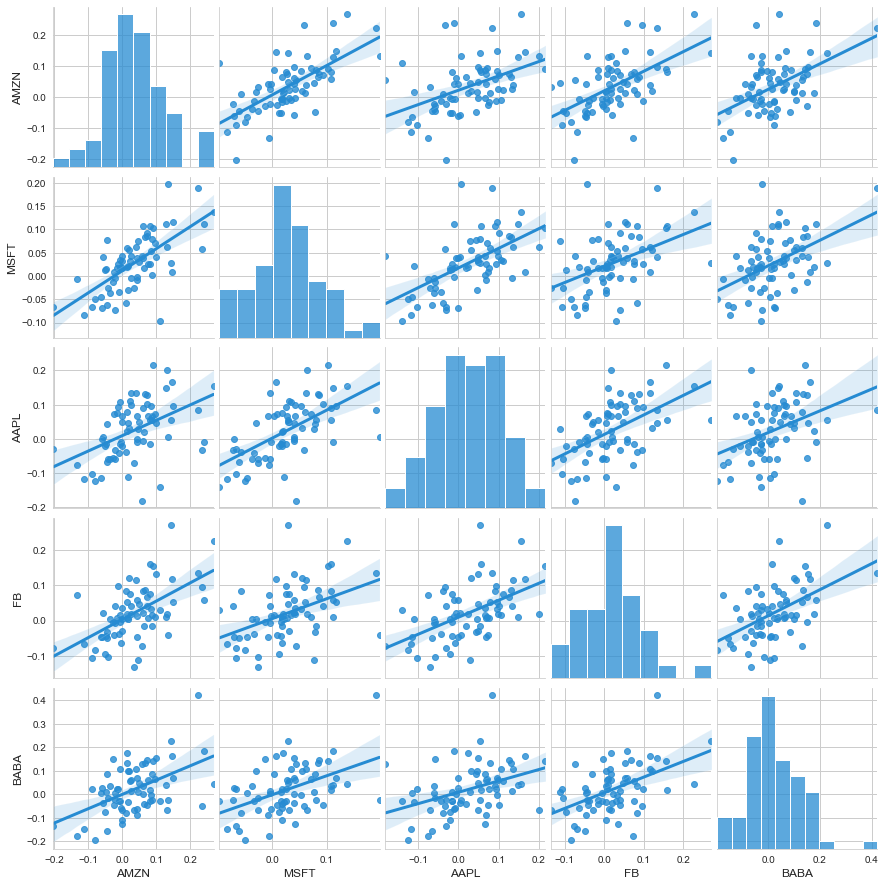

In [20]:
# Here we are simply calling pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons
sns.pairplot(returns_five, kind='reg')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

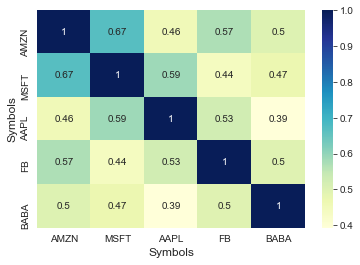

In [21]:
# Here we are using seabron for a quick correlation plot for the daily returns
sns.heatmap(returns_five.corr(), annot=True, cmap="YlGnBu")

5. Portfoilo optimization using Efficient Frontier?

In [22]:
adjusted_close = data['Adj Close'][company_name]
adjusted_close.head()

Symbols,AMZN,MSFT,AAPL,FB,BABA
Date,,,,,
2015-01-02,308.519989,41.647892,24.696352,78.449997,103.599998
2015-01-05,302.190002,41.264908,24.000614,77.190002,101.000000
2015-01-06,295.290009,40.659245,24.002876,76.150002,103.320000
2015-01-07,298.420013,41.175831,24.339447,76.150002,102.129997
2015-01-08,300.459991,42.387146,25.274624,78.180000,105.029999


In [23]:
daily_return = adjusted_close.pct_change()
daily_return.head()

Symbols,AMZN,MSFT,AAPL,FB,BABA
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.020517,-0.009196,-0.028172,-0.016061,-0.025097
2015-01-06,-0.022833,-0.014677,0.000094,-0.013473,0.022970
2015-01-07,0.010600,0.012705,0.014022,0.000000,-0.011518
2015-01-08,0.006836,0.029418,0.038422,0.026658,0.028395


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

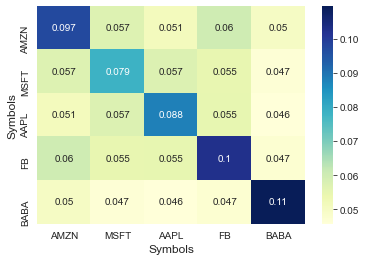

In [24]:
#Analysing of Annual portfiolo return and risk assuming 20% weight on each stock
#assuming trading days = 252 days in a year

weights = np.array([0.2,0.2,0.2,0.2,0.2])

portfolio_return = np.sum(daily_return.mean()* weights)*252
cov_matrix_annual = daily_return.cov()*252
sns.heatmap(cov_matrix_annual, annot=True, cmap="YlGnBu")

In [25]:
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
portfolio_std = np.sqrt(portfolio_variance)
risk_free_rate = 0.0178

sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
print("Expected annual return: " + str(round((portfolio_return * 100),2))+'%')
print("Expected Volatility: " + str(round((portfolio_std * 100),2))+'%')
print("Sharpe Ratio: " + str(round((sharpe_ratio),2)))

Expected annual return: 30.9%
Expected Volatility: 24.72%
Sharpe Ratio: 1.18


In [26]:
#calculate mean daily return and covariance of daily returns
mean_daily_returns = daily_return.mean()
cov_matrix = daily_return.cov()

#set number of runs of random portfolio weights
num_portfolios = 25000

In [27]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(5)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [28]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=adjusted_close.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=adjusted_close.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:" + str(round(rp*100,2)) + "%")
    print("Annualised Volatility:" + str(round(sdp*100,2)) + "%")
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:" + str(round(rp_min * 100,2)) + "%")
    print("Annualised Volatility:" + str(round(sdp_min * 100,2)) + "%")
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
   

    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='RdYlBu', marker='o', s=25, alpha=0.3)
    plt.colorbar(label = 'Sharpe ratio')
    plt.scatter(sdp,rp,marker=(5,1,0),color='r',s=100, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker=(5,1,0),color='g',s=100, label='Minimum volatility')

    target = np.linspace(rp_min, 0.42, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='--', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return:40.16%
Annualised Volatility:27.75%


Symbols      AMZN  MSFT   AAPL   FB  BABA
allocation  70.46  12.8  16.74  0.0   0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return:30.4%
Annualised Volatility:24.61%


Symbols      AMZN  MSFT   AAPL     FB   BABA
allocation  14.56  27.8  22.54  13.74  21.36


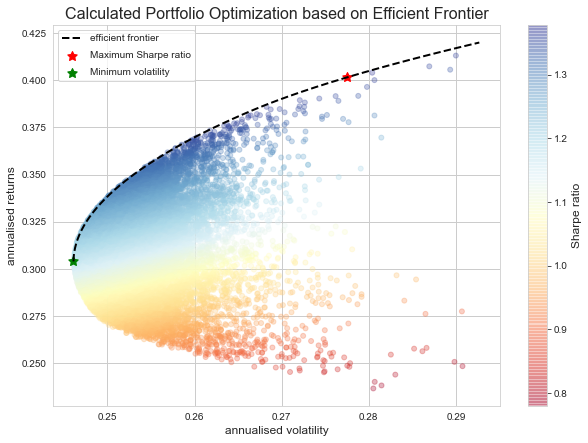

In [29]:
display_calculated_ef_with_random(mean_daily_returns, cov_matrix, num_portfolios, risk_free_rate)

In [30]:
# Calculating the expected returns and the annualised sample covariance matrix of asset returns
mu=expected_returns.mean_historical_return(adjusted_close)
S= risk_models.sample_cov(adjusted_close)

In [31]:
# For minimum volatility
ef=EfficientFrontier(mu,S)
weights=ef.min_volatility()
cleaned_weights=ef.clean_weights()
min_vol_port = ef.portfolio_performance(verbose=True)
print("Allocation of weight")
for x, y in cleaned_weights.items():
    print(x, y)

Expected annual return: 29.6%
Annual volatility: 24.6%
Sharpe Ratio: 1.12
Allocation of weight
AMZN 0.14463
MSFT 0.27911
AAPL 0.22417
FB 0.13675
BABA 0.21535


In [32]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(adjusted_close)
weights = cleaned_weights

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'MSFT': 14, 'AAPL': 20, 'FB': 6, 'BABA': 9}
Funds remaining: $693.02


6. How much value do we put at risk by investing in a particular stock?

<Figure size 504x360 with 0 Axes>

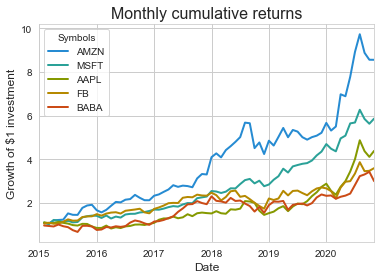

In [34]:
fig = plt.figure(figsize=(7, 5))
(returns_five + 1).cumprod().plot()
plt.xlabel("Date")
plt.ylabel("Growth of $1 investment")
plt.title("Monthly cumulative returns")
plt.show()

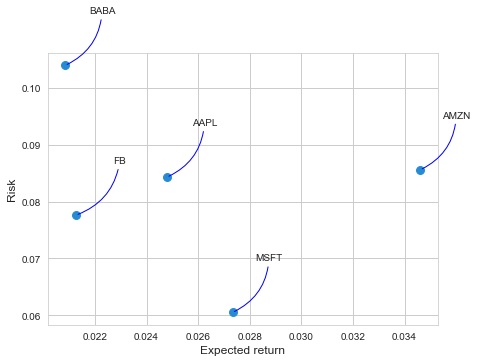

In [35]:
#Here e are defining a new DataFrame as a cleaned version of the original DataFrame
rets = returns_five.dropna()

area = np.pi*20

plt.figure(figsize=(7, 5))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

7. How can we attempt to predict future stock behavior using LSTM?

In [36]:
# Filtering the columns
df = MSFT.iloc[:,0:6]
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-04,218.320007,212.419998,214.020004,216.389999,42311800.0,216.389999
2020-11-05,224.119995,221.149994,222.039993,223.289993,36080100.0,223.289993
2020-11-06,224.360001,218.029999,222.259995,223.720001,25231900.0,223.720001
2020-11-09,228.119995,217.880005,224.440002,218.389999,44395000.0,218.389999
2020-11-10,216.500000,209.720001,214.500000,211.009995,43987600.0,211.009995


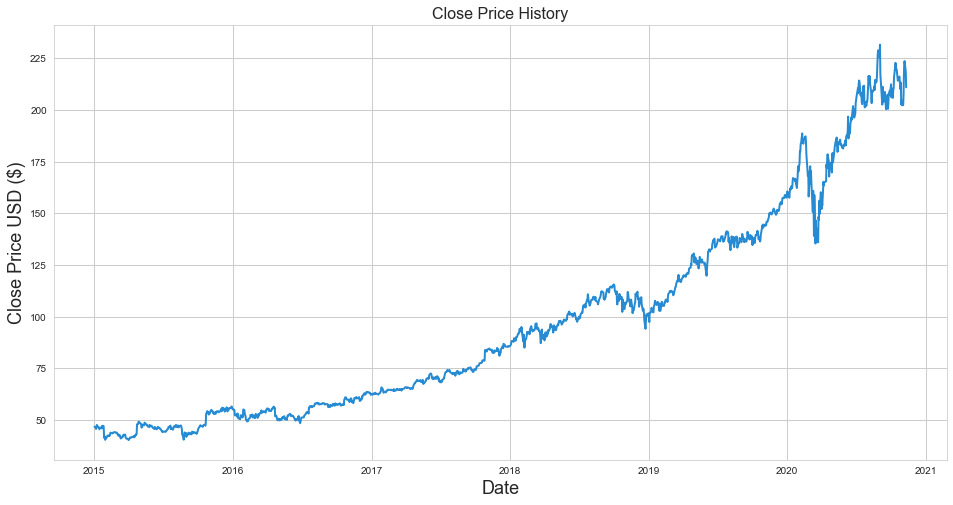

In [37]:
# here we are Visualising the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Create a new data frame with only the closing price and convert it to an array. Then create a variable to store the length of the training data set. I want the training data set to contain about 80% of the data.

In [42]:
#Creating a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

1181

Now scale the data set to be values between 0 and 1 inclusive, I do this because it is generally good practice to scale your data before giving it to the neural network.

In [43]:
# here we are Scaling the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.03381061],
       [0.03156355],
       [0.02801004],
       ...,
       [0.95855982],
       [0.93070655],
       [0.89214047]])

In [44]:
#Creating the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
#Spliting the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [45]:
#Here we are Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [46]:
# Here we are reshaping the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [47]:
#now we are Building the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [48]:
# here we are Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
# here we are training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1121/1121 [==============================] - 16s 14ms/step - loss: 6.0739e-04


In [50]:
# here we are testing data set
test_data = scaled_data[training_data_len - 60: , : ]
#Creating the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [51]:
# here we are converting x_test to a numpy array  
x_test = np.array(x_test)

In [52]:
# here we are reshaping the data into the shape accepted by the LSTM  
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [53]:
# now we are getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [ ]:
# here we are calculaing the value of Root Mean Square Error
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid.tail()